In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('../data/raw/kidney_disease_dataset.csv')

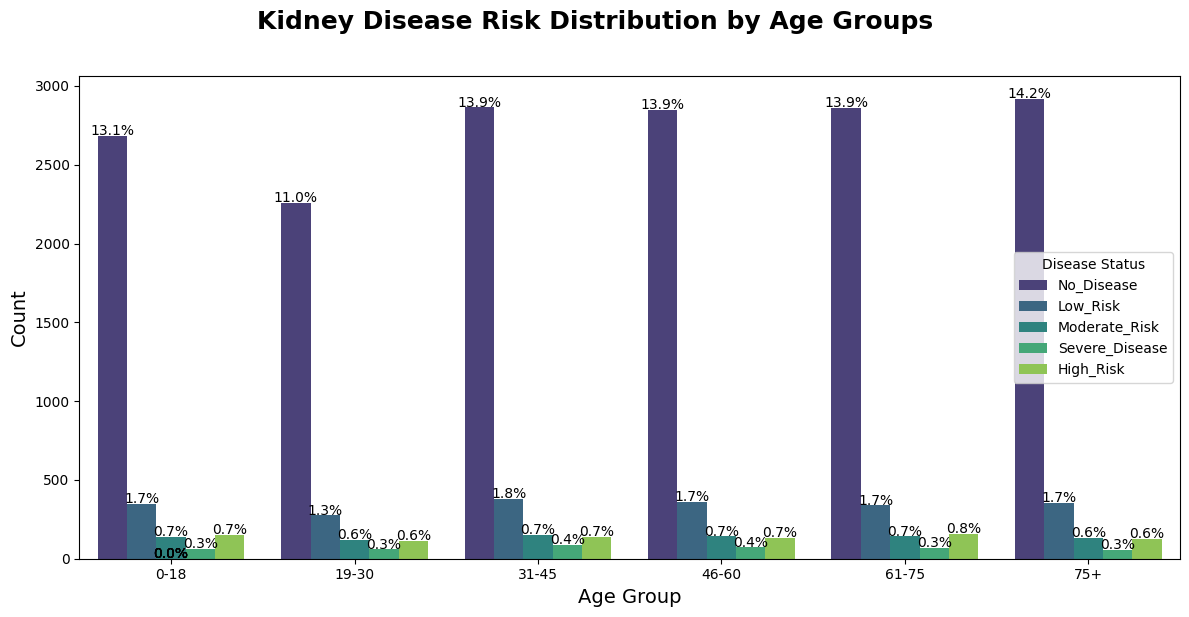

In [38]:
plt.figure(figsize=(12, 6))

bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61-75', '75+']
df['Age_Group'] = pd.cut(df['Age of the patient'], bins=bins, labels=labels)

ax = sns.countplot(x='Age_Group', hue='Target', data=df, palette='viridis')
plt.suptitle('Kidney Disease Risk Distribution by Age Groups', y=1.02, fontsize=18, weight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Disease Status')

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 5
    ax.annotate(percentage, (x, y), ha='center')
plt.tight_layout()
plt.savefig('../reports/figures/riskDistributionbyAge.png')
plt.show()

C:\Users\OSHITH\AppData\Local\Temp\ipykernel_19516\50505114.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Blood pressure (mm/Hg)', data=df, palette='viridis')


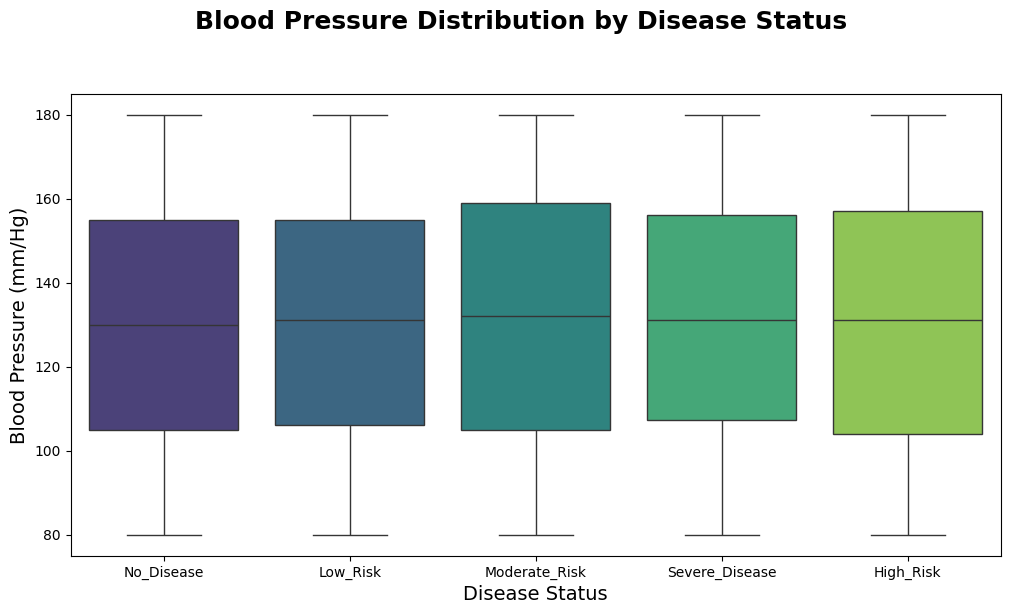

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Target', y='Blood pressure (mm/Hg)', data=df, palette='viridis')
plt.suptitle('Blood Pressure Distribution by Disease Status', y=1.02, fontsize=18, weight='bold')
plt.xlabel('Disease Status', fontsize=14)
plt.ylabel('Blood Pressure (mm/Hg)', fontsize=14)
plt.savefig('../reports/figures/bloodPressureDistributionbyDisease.png')
plt.show()

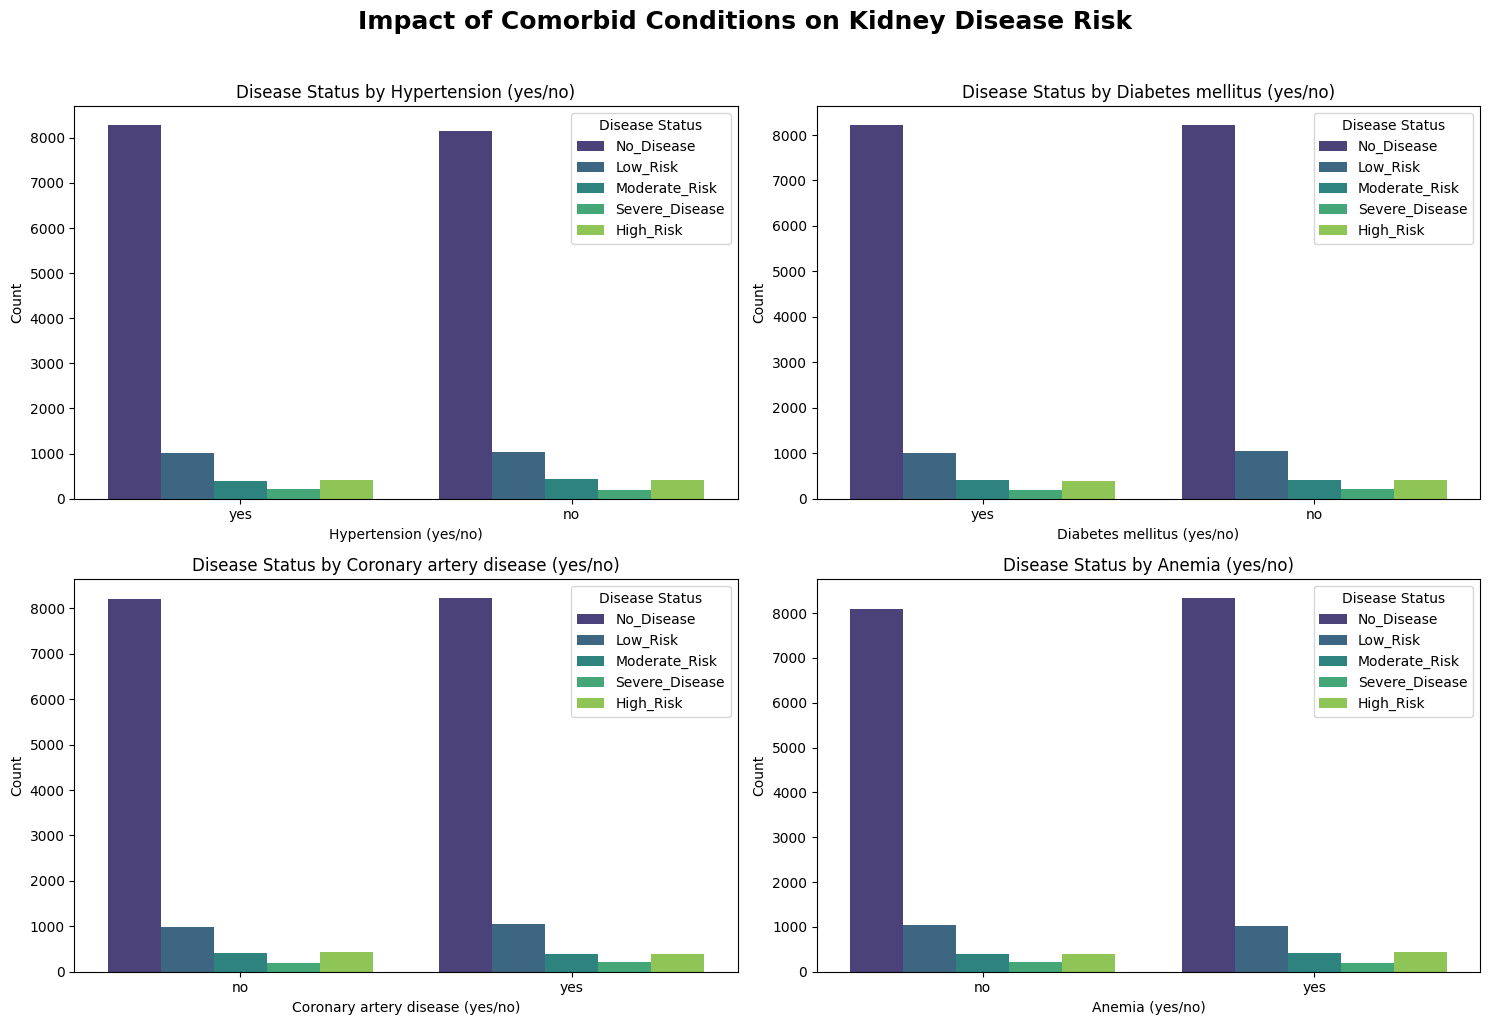

In [40]:
categorical_cols = ['Hypertension (yes/no)', 'Diabetes mellitus (yes/no)', 
                   'Coronary artery disease (yes/no)', 'Anemia (yes/no)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Target', data=df, palette='viridis')
    plt.title(f'Disease Status by {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.legend(title='Disease Status')
plt.suptitle('Impact of Comorbid Conditions on Kidney Disease Risk', y=1.02, fontsize=18, weight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/comorbidConditionsImpact.png')
plt.show()